# Elbow method K-means
This notebook is for illustrating elbow method to determine number of clusters for kmeans. The idea is to use an  kmeans on an image. This way when we look at the cluster centers for the image we will have a better idea if the number of clusters we chose were appropriate.

## Import all required libraries


In [1]:
import cv2
from sklearn.cluster import KMeans 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the image

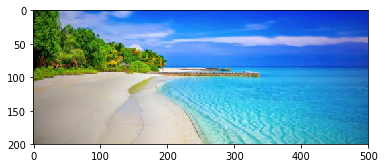

In [2]:
img = cv2.imread("data/Primary Colors.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

Looking at the image if at the first glance we see three colors. Blue, green and gray. Now lets try finding a good value of k and see if it is close to 3.

## Reshape the image for clustering

In [3]:
x, y, z = img.shape
img = img.reshape(x*y, z)
img.shape

(100000, 3)

## Run kmeans varying the number of clusters from 1 to 20

For each value of k also capture the kmeans inertia, which is the mean squared error of the points from their respective centers obtained by clustering

In [4]:
cluster_mss = []
k_values = range(1, 20)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(img)
    cluster_mss.append(kmeans.inertia_)

## Plot the MSS

Now we can plot the captured inertia values for each cluster to see how it varies. We generally choose the value of k where there is little or no change obtained when we increase the value of k.

/home/rikith/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/home/rikith/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


Text(0.5, 0, 'Value of K')

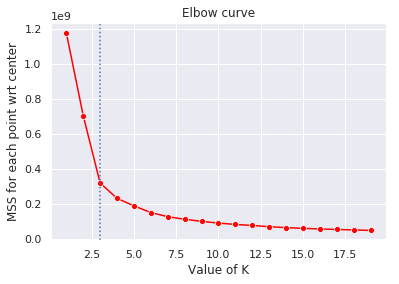

In [8]:
sns.set()
sns.lineplot(k_values, cluster_mss, markers=True,  marker="o", c="red")
plt.axvline(x=3, linestyle= ':')
# plt.plot(k_values, cluster_mss, "ro")
# plt.plot(k_values, cluster_mss, "r")
plt.title("Elbow curve")
plt.ylabel("MSS for each point wrt center")
plt.xlabel("Value of K")


From the plot below we can see that the MSS value has very little  change after k=3 (which is like an elbow). This means that a cluster number of 3 is a good number to choose the number of clusters in the original image.

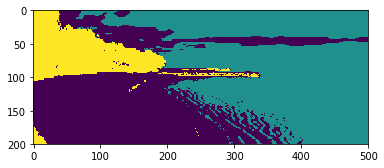

In [6]:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(img)
plt.imshow(kmeans.labels_.reshape(x,y))

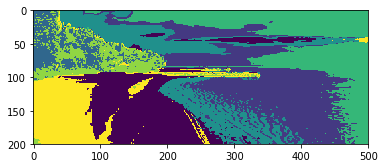

In [7]:
kmeans = KMeans(n_clusters=7)
kmeans = kmeans.fit(img)
plt.imshow(kmeans.labels_.reshape(x,y))